In [6]:
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import numpy as np
import matplotlib.pyplot as plt
import jax
import copy
import queue
from shower_sim_redone import make_simulator

simulator = make_simulator()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:

from shower_sim_optimize import optimize, program_to_optimize
from shower_sim_baseline import summary_metric
the_program = program_to_optimize(simulator, summary_metric, sim_kwargs={'reuse_rvs': True, 'split_prob': 1.0})

In [8]:
hits,active,history,scores,out_st = simulator(3.5, split_prob=1.0)
print(scores, out_st['w'], hits.size, out_st['y']['hits'].size)

-4.363289 21.886445661017206 2760 2996


In [9]:
theta_init = 3.0
Nmini=2
LR = 0.01
Nepoch = 500

print("#### STAD ####")
opt_par_st, par_st, l_st, g_st = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "stad")

print("#### SCORE ####")
opt_par_s, par_s, l_s, g_s = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=False)

print("#### SCORE Baseline ####")
opt_par_sb, par_sb, l_sb, g_sb = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=True)

print("#### NUMERIC ####")
opt_par_n, par_n, l_n, g_n = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "numeric")

#### STAD ####


100%|██████████| 500/500 [01:27<00:00,  5.73it/s]


#### SCORE ####


100%|██████████| 500/500 [01:36<00:00,  5.18it/s]


#### SCORE Baseline ####


100%|██████████| 500/500 [01:28<00:00,  5.65it/s]


#### NUMERIC ####


100%|██████████| 500/500 [03:20<00:00,  2.49it/s]


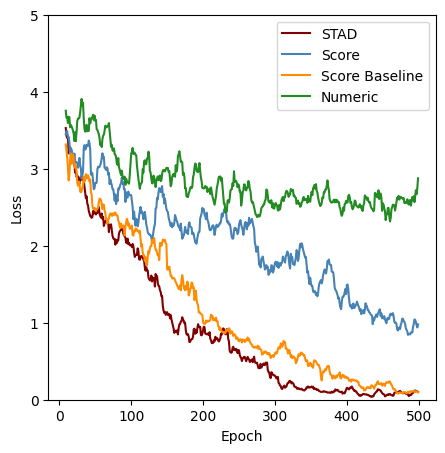

In [10]:
from plots_optimization import plot_single_opt_comparison
f,ax = plt.subplots()
plot_single_opt_comparison(ax,l_st, l_s, l_sb, l_n)
f.set_size_inches(5,5)

# With Error Bands

In [11]:
theta_init = 3.0
Nmini=2
LR = 0.01
Nepoch = 500 

Nopt = 10

opt_par_st_list, par_st_list, l_st_list, g_st_list = [], [], [], []
opt_par_s_list, par_s_list, l_s_list, g_s_list = [], [], [], []
opt_par_sb_list, par_sb_list, l_sb_list, g_sb_list = [], [], [], []
opt_par_n_list, par_n_list, l_n_list, g_n_list = [], [], [], []

for j in range(Nopt):
    print("######## Optimization", j, "########")
    
    opt_par_st, par_st, l_st, g_st = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "stad", doprint=False)
    opt_par_st_list.append(par_st)
    par_st_list.append(par_st) 
    l_st_list.append(l_st)
    g_st_list.append(g_st)
    print("STAD Loss final= {:5.3f}".format(l_st[-1]), "Loss min= {:5.3f}".format(np.min(l_st)))

    opt_par_s, par_s, l_s, g_s = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=False, doprint=False)
    opt_par_s_list.append(par_s)
    par_s_list.append(par_s) 
    l_s_list.append(l_s)
    g_s_list.append(g_s)
    print("Score Loss final= {:5.3f}".format(l_s[-1]), "Loss min= {:5.3f}".format(np.min(l_s)))
    
    opt_par_sb, par_sb, l_sb, g_sb = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=True, doprint=False)
    opt_par_sb_list.append(par_sb)
    par_sb_list.append(par_sb) 
    l_sb_list.append(l_sb)
    g_sb_list.append(g_sb)
    print("Score (baseline) Loss final= {:5.3f}".format(l_sb[-1]), "Loss min= {:5.3f}".format(np.min(l_sb)))
    
    opt_par_n, par_n, l_n, g_n = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "numeric", doprint=False)
    opt_par_n_list.append(par_n)
    par_n_list.append(par_n) 
    l_n_list.append(l_n)
    g_n_list.append(g_n)
    print("Numeric Loss final= {:5.3f}".format(l_n[-1]), "Loss min= {:5.3f}".format(np.min(l_n)))
    
    

######## Optimization 0 ########


100%|██████████| 500/500 [01:30<00:00,  5.52it/s]


STAD Loss final= 0.020 Loss min= 0.020


100%|██████████| 500/500 [01:35<00:00,  5.22it/s]


Score Loss final= 0.916 Loss min= 0.594


100%|██████████| 500/500 [01:25<00:00,  5.85it/s]


Score (baseline) Loss final= 0.075 Loss min= 0.003


100%|██████████| 500/500 [03:19<00:00,  2.51it/s]


Numeric Loss final= 4.827 Loss min= 1.791
######## Optimization 1 ########


100%|██████████| 500/500 [01:26<00:00,  5.78it/s]


STAD Loss final= 0.087 Loss min= 0.010


100%|██████████| 500/500 [01:31<00:00,  5.44it/s]


Score Loss final= 1.128 Loss min= 0.286


100%|██████████| 500/500 [01:28<00:00,  5.64it/s]


Score (baseline) Loss final= 0.210 Loss min= 0.018


100%|██████████| 500/500 [03:21<00:00,  2.48it/s]


Numeric Loss final= 1.955 Loss min= 1.496
######## Optimization 2 ########


100%|██████████| 500/500 [01:26<00:00,  5.76it/s]


STAD Loss final= 0.107 Loss min= 0.004


100%|██████████| 500/500 [01:35<00:00,  5.23it/s]


Score Loss final= 0.911 Loss min= 0.654


100%|██████████| 500/500 [01:25<00:00,  5.88it/s]


Score (baseline) Loss final= 0.155 Loss min= 0.002


100%|██████████| 500/500 [03:16<00:00,  2.55it/s]


Numeric Loss final= 1.824 Loss min= 1.535
######## Optimization 3 ########


100%|██████████| 500/500 [01:27<00:00,  5.71it/s]


STAD Loss final= 0.047 Loss min= 0.001


100%|██████████| 500/500 [01:34<00:00,  5.28it/s]


Score Loss final= 0.931 Loss min= 0.416


100%|██████████| 500/500 [01:27<00:00,  5.71it/s]


Score (baseline) Loss final= 0.039 Loss min= 0.001


100%|██████████| 500/500 [03:13<00:00,  2.58it/s]


Numeric Loss final= 1.677 Loss min= 1.287
######## Optimization 4 ########


100%|██████████| 500/500 [01:27<00:00,  5.73it/s]


STAD Loss final= 0.040 Loss min= 0.001


100%|██████████| 500/500 [01:32<00:00,  5.40it/s]


Score Loss final= 0.639 Loss min= 0.323


100%|██████████| 500/500 [01:26<00:00,  5.79it/s]


Score (baseline) Loss final= 0.070 Loss min= 0.002


100%|██████████| 500/500 [03:11<00:00,  2.61it/s]


Numeric Loss final= 1.744 Loss min= 1.142
######## Optimization 5 ########


100%|██████████| 500/500 [01:26<00:00,  5.81it/s]


STAD Loss final= 0.003 Loss min= 0.003


100%|██████████| 500/500 [01:33<00:00,  5.37it/s]


Score Loss final= 0.541 Loss min= 0.432


100%|██████████| 500/500 [01:26<00:00,  5.76it/s]


Score (baseline) Loss final= 0.336 Loss min= 0.002


100%|██████████| 500/500 [03:16<00:00,  2.54it/s]


Numeric Loss final= 2.420 Loss min= 1.561
######## Optimization 6 ########


100%|██████████| 500/500 [01:27<00:00,  5.70it/s]


STAD Loss final= 0.021 Loss min= 0.009


100%|██████████| 500/500 [01:35<00:00,  5.22it/s]


Score Loss final= 0.868 Loss min= 0.622


100%|██████████| 500/500 [01:27<00:00,  5.74it/s]


Score (baseline) Loss final= 0.035 Loss min= 0.012


100%|██████████| 500/500 [03:21<00:00,  2.48it/s]


Numeric Loss final= 3.965 Loss min= 1.835
######## Optimization 7 ########


100%|██████████| 500/500 [01:26<00:00,  5.77it/s]


STAD Loss final= 0.099 Loss min= 0.013


100%|██████████| 500/500 [01:32<00:00,  5.38it/s]


Score Loss final= 0.421 Loss min= 0.302


100%|██████████| 500/500 [01:27<00:00,  5.72it/s]


Score (baseline) Loss final= 0.144 Loss min= 0.003


100%|██████████| 500/500 [03:20<00:00,  2.50it/s]


Numeric Loss final= 3.353 Loss min= 2.305
######## Optimization 8 ########


100%|██████████| 500/500 [01:26<00:00,  5.79it/s]


STAD Loss final= 0.043 Loss min= 0.004


100%|██████████| 500/500 [01:34<00:00,  5.29it/s]


Score Loss final= 0.713 Loss min= 0.408


100%|██████████| 500/500 [01:25<00:00,  5.87it/s]


Score (baseline) Loss final= 0.012 Loss min= 0.000


100%|██████████| 500/500 [03:20<00:00,  2.49it/s]


Numeric Loss final= 4.500 Loss min= 2.253
######## Optimization 9 ########


100%|██████████| 500/500 [01:27<00:00,  5.74it/s]


STAD Loss final= 0.014 Loss min= 0.004


100%|██████████| 500/500 [01:32<00:00,  5.39it/s]


Score Loss final= 0.406 Loss min= 0.277


100%|██████████| 500/500 [01:29<00:00,  5.59it/s]


Score (baseline) Loss final= 0.494 Loss min= 0.009


100%|██████████| 500/500 [03:31<00:00,  2.36it/s]

Numeric Loss final= 4.923 Loss min= 2.609


In [12]:
l_st_list = np.array(l_st_list)
l_st_list_mean = np.mean(l_st_list, axis=0)
l_st_list_std = np.std(l_st_list, axis=0)

g_st_list = np.array(g_st_list)
g_st_list_mean = np.mean(g_st_list, axis=0)
g_st_list_std = np.std(g_st_list, axis=0)

l_s_list = np.array(l_s_list)
l_s_list_mean = np.mean(l_s_list, axis=0)
l_s_list_std = np.std(l_s_list, axis=0)

g_s_list = np.array(g_s_list)
g_s_list_mean = np.mean(g_s_list, axis=0)
g_s_list_std = np.std(g_s_list, axis=0)

l_sb_list = np.array(l_sb_list)
l_sb_list_mean = np.mean(l_sb_list, axis=0)
l_sb_list_std = np.std(l_sb_list, axis=0)

g_sb_list = np.array(g_sb_list)
g_sb_list_mean = np.mean(g_sb_list, axis=0)
g_sb_list_std = np.std(g_sb_list, axis=0)

l_n_list = np.array(l_n_list)
l_n_list_mean = np.mean(l_n_list, axis=0)
l_n_list_std = np.std(l_n_list, axis=0)

g_n_list = np.array(g_n_list)
g_n_list_mean = np.mean(g_n_list, axis=0)
g_n_list_std = np.std(g_n_list, axis=0)

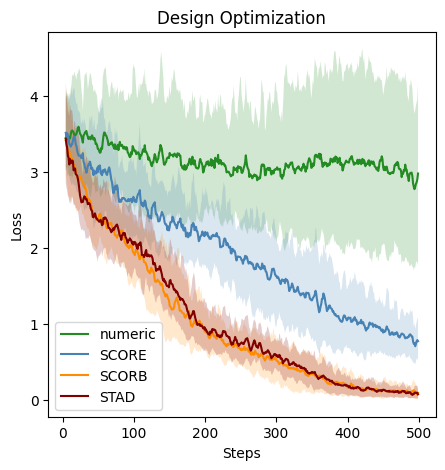

In [16]:
from plots_optimization import plot_optimization_comparison

f,ax = plt.subplots(1,1)
plot_optimization_comparison(ax, l_st_list,
    l_s_list,
    l_n_list,
    l_sb_list
)
f.set_size_inches(5,5)
f.savefig('optim.pdf')